In [2]:
# Подключение библиотек
import suncal
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Задание переменных 
L = sym.symbols("L")         # Символ длины
I = sym.symbols("I14")       # Символ тока
U = sym.symbols("U23")       # Символ напряжения
Ll = 0.1                     # см - Длина
Ld = 0.001                   # см - Погрешность длины
Ii = 1e-3                    # А - Ток источника
Id = 0.1e-3                  # А - Погрешность тока
Uu = 1.05                    # В - Напряжение
Ud = 0.001                   # В - Погрешность напряжения


In [4]:
# Модель измерений
ρ = 2*sym.pi*L*U/I
display(ρ)

2*pi*L*U23/I14

In [5]:
data = {"Входные переменные": ["L", "I", "U"],"μ": [Ll, Ii, Uu,],"Тип А": ["-", "-", Ud],"Распределение А": ["-", "-", "Нормальное"],"Тип B": [Ld, Id, "-"],"Распределение B": ["Равномерное", "Равномерное", "-"]}
data_pandas = pd.DataFrame(data)
data_pandas 

,Входные переменные,μ,Тип А,Распределение А,Тип B,Распределение B
0,L,0.100,-,-,0.001,Равномерное
1,I,0.001,-,-,0.0001,Равномерное
2,U,1.050,0.001,Нормальное,-,-


In [6]:
# расчет неопределенности типа в
ρL = sym.diff(ρ,L)              # Расчет частной производной по L
display("частная производная по L :",ρL)
CL = 2*np.pi*Uu/Ii              # Коэффициент чувствительности

ρI = sym.diff(ρ,I)              # Расчет частной производной по I
display("частная производная по I :",ρI)
CI = -2*np.pi*Ll*Uu/((Ii)**2)   # Коэффициент чувствительности


ub = np.sqrt((CL**2)*(Ld**2)+(CI**2)*(Id**2))  # Суммарная неопределенность типа В
print("Значение суммарной неопределенности типа В :",'%.2f'%ub)

'частная производная по L :'

2*pi*U23/I14

'частная производная по I :'

-2*pi*L*U23/I14**2

Значение суммарной неопределенности типа В : 66.30


In [7]:
# Расчет неопределённости типа а

ρU=sym.diff(ρ,U)              # Расчет частной производной по U
display('частная производная по L :',ρU)
CU = 2*np.pi*Ll/Ii              # Коэффициент чувствительности
ua=np.sqrt((CU**2)*(Ud**2))
print("Значение суммарной неопределенности типа A :",'%.2f'%ua)


'частная производная по L :'

2*pi*L/I14

Значение суммарной неопределенности типа A : 0.63


In [8]:
# расчет суммарной неопределённости 
uc=np.sqrt(ua**2+ub**2)
print("Значение суммарной неопределенности  :",'%.2f'%uc)

Значение суммарной неопределенности  : 66.31


In [9]:
# Расчет степени свободы
v=(uc)**4/((Ud**4)/29+(Ld**4)/(0.5*0.01**-2)+(Id**4)/(0.5*0.1**-2))*1e-20
print("Так как",'%.2f'%v,"*1e20 >>30 то k =2.04")

Так как 5.57 *1e20 >>30 то k =2.04


In [10]:
ρρ = 2 *np.pi*Ll*Uu/Ii
print("Значение сопротивления :",'%.2f'%ρρ) 
U95=2.04*uc
print("Расширенная неопределённость при вероятности охвата 95%:",'%.2f'%U95)
U9=U95/ρρ*100
print("Итоговый результат :",'%.2f'%ρρ,"±",'%.2f'%U95,"=",'%.2f'%ρρ,"±",'%.0f'%U9,"%")

Значение сопротивления : 659.73
Расширенная неопределённость при вероятности охвата 95%: 135.26
Итоговый результат : 659.73 ± 135.26 = 659.73 ± 21 %


In [11]:
Pl=(CL*Ld)**2/uc**2*100
print("Вклад погрешности L в общую неопределённость:",'%.2f'%Pl,"%")
Pu=(CU*Ud)**2/uc**2*100
print("Вклад погрешности U в общую неопределенность:",'%.2f'%Pu,"%")
Pi=(CI*Id)**2/uc**2*100
print("Вклад погрешности I в общую неопределённость:",'%.2f'%Pi,"%")

Вклад погрешности L в общую неопределённость: 0.99 %
Вклад погрешности U в общую неопределенность: 0.01 %
Вклад погрешности I в общую неопределённость: 99.00 %


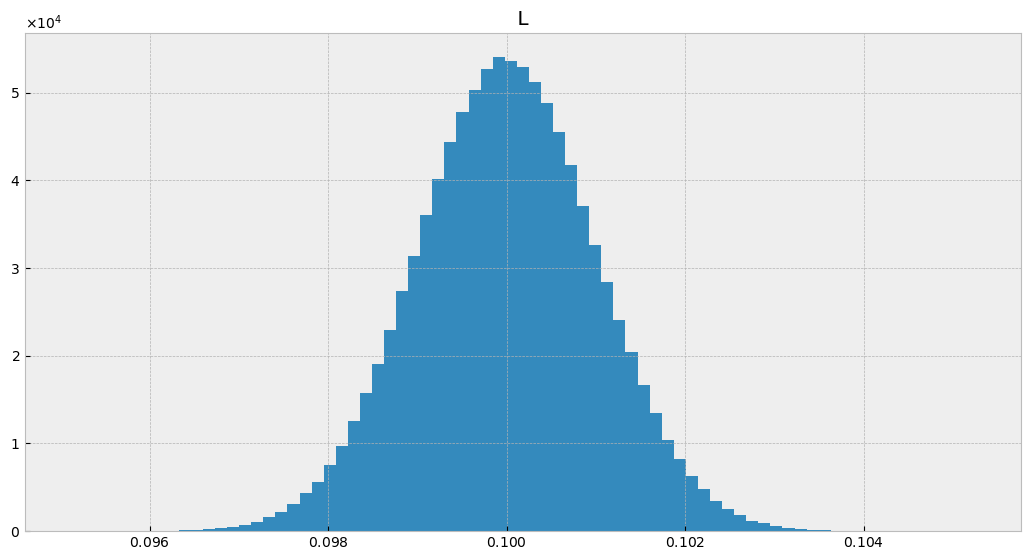

In [12]:
# метод Монте-Карло для длины
num_reps = 1000000
Lmc = np.random.normal(Ll, Ld, num_reps)
fig, ax = plt.subplots(figsize = [12,6],dpi = 100)  
n, bin, patches = plt.hist(Lmc,bins=75)
plt.title(' L ')
plt.grid(visible=True)
plt.show()


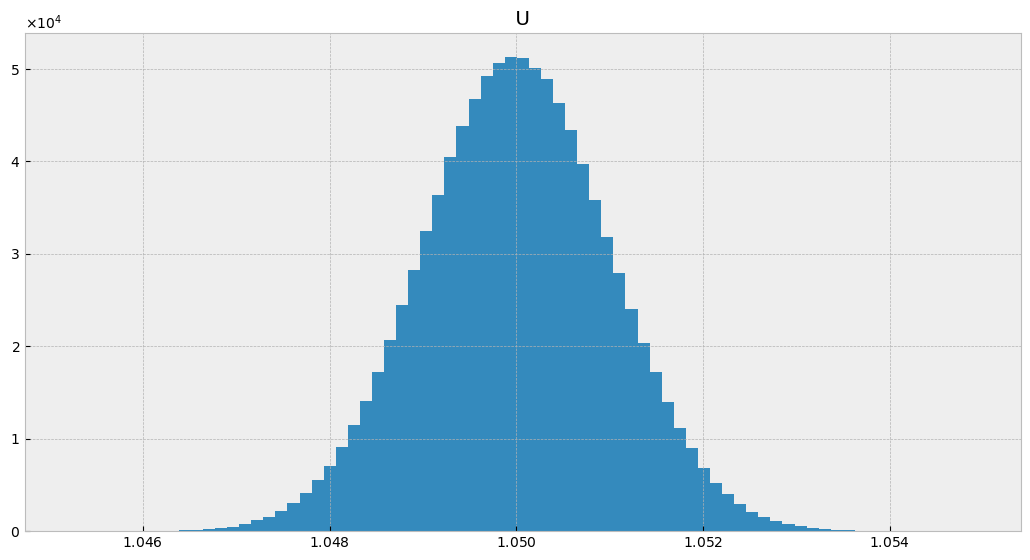

In [13]:
# метод Монте-Карло для напряжения
Umc= np.random.normal(Uu, Ud, num_reps)
fig, ax = plt.subplots(figsize = [12,6],dpi = 100)  
n, bin, patches = plt.hist(Umc,bins=75)
plt.grid(visible=True)
plt.title(' U ')
plt.show()

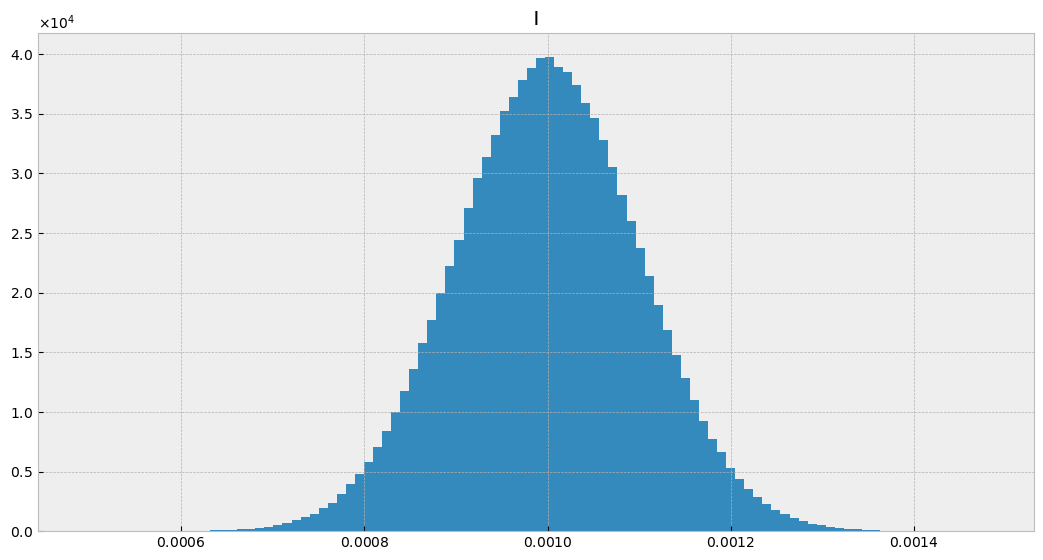

In [14]:
# метод Монте-Карло для Тока
Imc = np.random.normal(Ii, Id, num_reps)
fig, ax = plt.subplots(figsize = [12,6],dpi = 100)  
n, bin, patches = plt.hist(Imc,bins=100)
plt.grid(visible=True)
plt.title(' I ')
plt.show()

In [15]:
def gauss(x,amp,mu,sigma):
    return amp*np.exp(-(x*mu)**2/(2*sigma**2))

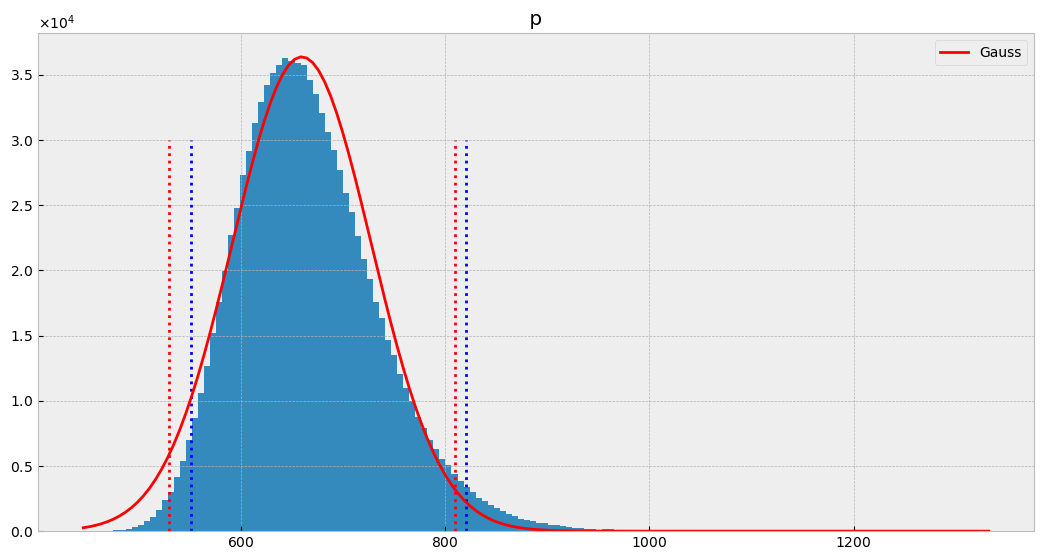

820.956088663947
550.8915853861
Итоговый результат : 640.79 ± 135.03


In [27]:
# метод Монте-Карло для удельного сопротивления
mu, sigma = 659.70, 68.
pmc=np.zeros(num_reps)
for i in range(num_reps):
    pmc[i]=2*np.pi*Lmc[i]*Umc[i]/Imc[i]
   
f1=np.percentile(pmc,2.5)
f2=np.percentile(pmc,97.5)
fig, ax = plt.subplots(figsize = [12,6],dpi = 100)  
n, bin, patches = plt.hist(pmc,bins=150)
plt.title(' p ')
plt.grid(visible=True)
f6=530
f8=810
plt.vlines(x = f1, ymin=0, ymax=30000, colors='blue', ls=':', lw=2, )
plt.vlines(x = f2, ymin=0, ymax=30000, colors='blue', ls=':', lw=2, )
plt.vlines(x = f6, ymin=0, ymax=30000, colors='red', ls=':', lw=2, )
plt.vlines(x = f8, ymin=0, ymax=30000, colors='red', ls=':', lw=2, )
plt.plot(bin, 6200000/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bin - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r',label='Gauss')
plt.legend()
plt.show()



f3=(bin[np.where(n == n.max())])
f4=((f2-f1)/2)
print(f2)
print(f1)
print("Итоговый результат :",'%.2f'%f3,"±",'%.2f'%f4)


In [17]:
pmc1=np.zeros(num_reps)
for i in range(num_reps):
    pmc1[i]=2*np.pi*Lmc[i]*Uu/Ii
f11=np.percentile(pmc1,2.5)
f22=np.percentile(pmc1,97.5)
f6=523
f8=817
f5=(((f22-f11)/2)**2)/(f4**2)*100
print("Вклад погрешности L в общую неопределённость:",'%.2f'%f5,"%")


Вклад погрешности L в общую неопределённость: 0.92 %


In [18]:
pmc2=np.zeros(num_reps)
for i in range(num_reps):
    pmc2[i]=2*np.pi*Ll*Umc[i]/Ii
f1=np.percentile(pmc2,2.5)
f2=np.percentile(pmc2,97.5)
f6=(((f2-f1)/2)**2)/(f4**2)*100
print("Вклад погрешности U в общую неопределённость:",'%.2f'%f6,"%")

Вклад погрешности U в общую неопределённость: 0.01 %


In [19]:
pmc3=np.zeros(num_reps)
for i in range(num_reps):
    pmc3[i]=2*np.pi*Ll*Uu/Imc[i]
f1=np.percentile(pmc3,2.5)
f2=np.percentile(pmc3,97.5)
f7=(((f2-f1)/2)**2)/(f4**2)*100
print("Вклад погрешности I в общую неопределённость:",'%.2f'%f7,"%")


Вклад погрешности I в общую неопределённость: 98.92 %


In [20]:
data1 = {"Сравнение": ["ρ", "dρ", "CL","CU","CI"],"Монте-Карло": [649.65, 134.97, 0.92,0.01,99.01],"GUM": [659.73, 135.26,0.99 ,0.01,99]}
data_pandas = pd.DataFrame(data1)
data_pandas 

,Сравнение,Монте-Карло,GUM
0,ρ,649.65,659.73
1,dρ,134.97,135.26
2,CL,0.92,0.99
3,CU,0.01,0.01
4,CI,99.01,99.00


In [21]:
print(f8-f22)
print(f11-f6)
delta=0.5*1000
print(delta)

144.30786715257477
646.8145123611228
500.0
